A stroke occurs when the boold supply to the brain id interrupted, leading to damage or death of brain cells. The risk factors for stroke include high blood pressure, smoking, diabetes, obesity, family history of stroke, and previous history of stroke or heart disease.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
path = "E:\Datasets&Pictures for Coding\healthcare-dataset-stroke-data.csv"
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# since there is only one patient with Other sex, so we drop the row from our datd
df.drop(df[df['gender'] == 'Other'].index,inplace = True) 

In [5]:
# cecking the null values in the dataset
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# a small description of the dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [7]:
# information of the features and response variable in the dataset
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [8]:
df.bmi.fillna(28.1,inplace=True)
# replace the null values by median of bmi

In [9]:
# checking the distribution of the categorical features in the dataset
categorical_features = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
for feat in categorical_features:
    print(feat, ':')
    print('\n',df[feat].value_counts())
    print('\n----------------------------------')

gender :

 Female    2994
Male      2115
Name: gender, dtype: int64

----------------------------------
hypertension :

 0    4611
1     498
Name: hypertension, dtype: int64

----------------------------------
heart_disease :

 0    4833
1     276
Name: heart_disease, dtype: int64

----------------------------------
ever_married :

 Yes    3353
No     1756
Name: ever_married, dtype: int64

----------------------------------
work_type :

 Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

----------------------------------
Residence_type :

 Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

----------------------------------
smoking_status :

 never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

----------------------------------


### Exploratory data visualization

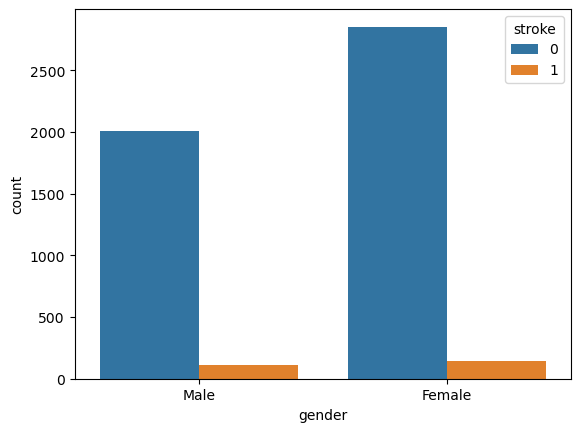

In [10]:
sns.countplot(x = 'gender',hue = 'stroke',data = df);
# in comparison,large number of female has stroke than male and
# even for healthy persons females are more than males

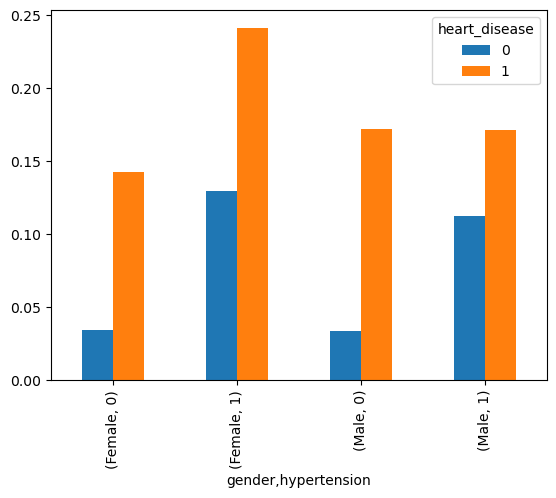

In [11]:
s = df.groupby(['gender','hypertension','heart_disease'])['stroke'].mean().unstack()
s.plot(kind ='bar',stacked = False,);

The height of each stack represents the proportion of the response variable for each combination of the categorical variables.

So, 1st stack tells female with no hypertension and no heart disease has less chance of stroke tha with heart disease.

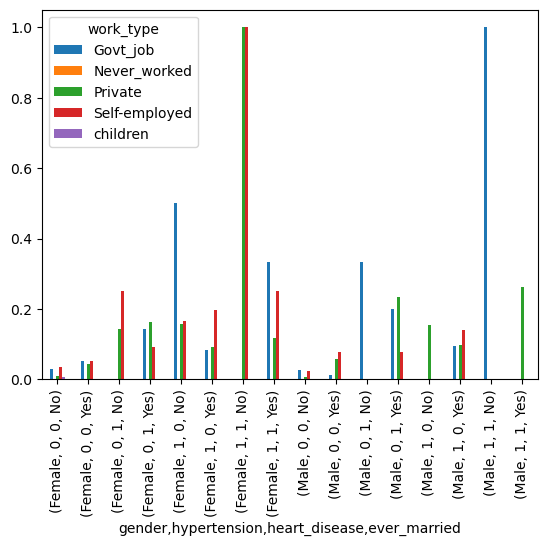

In [12]:
(df.groupby(['gender','hypertension','heart_disease','ever_married','work_type'])['stroke'].mean().unstack()).plot(kind = 'bar');

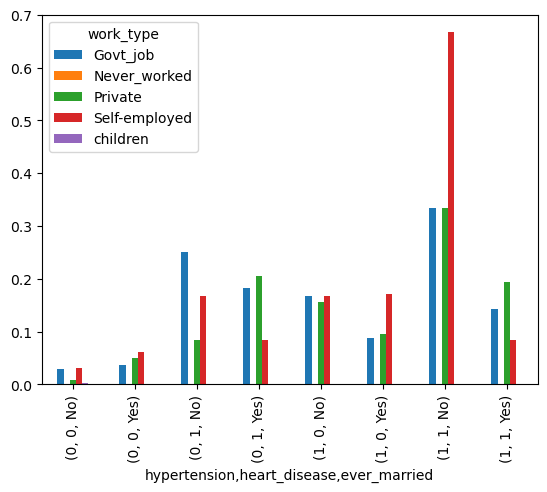

In [13]:
(df.groupby(['hypertension','heart_disease','ever_married','work_type'])['stroke'].mean().unstack()).plot(kind = 'bar');

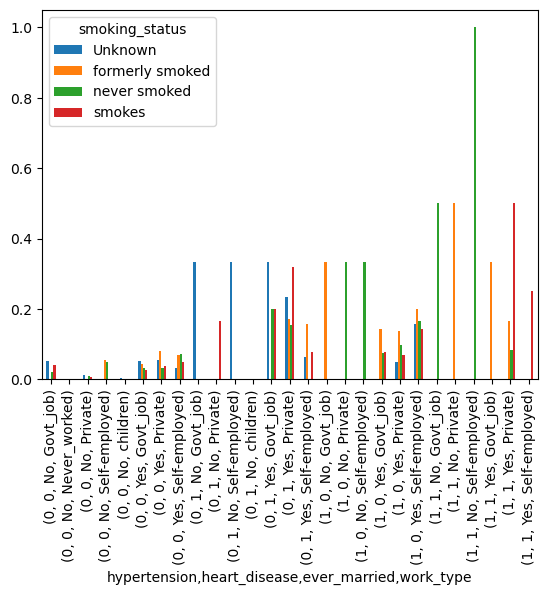

In [14]:
(df.groupby(['hypertension','heart_disease','ever_married','work_type','smoking_status'])['stroke'].mean().unstack()).plot(kind = 'bar');

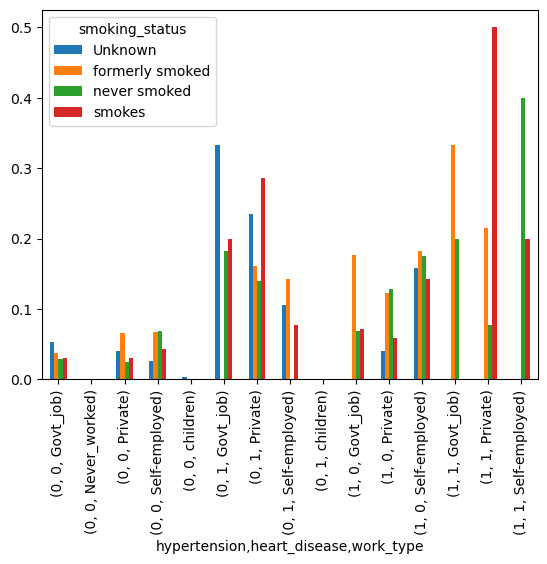

In [15]:
(df.groupby(['hypertension','heart_disease','work_type','smoking_status'])['stroke'].mean().unstack()).plot(kind = 'bar');

### Here we are analysing categorical variables, to compare them we will use the chi-square test. Null hypothesis(H0) is the variables do not have a significant relation. Alternative hypothesis(H1) is the variables do have a significant relation.

In [16]:
df_1 = df.copy()

In [17]:
df_1['gender'][df_1['gender'] == 'Male'] = 1
df_1['gender'][df_1['gender'] == 'Female'] = 0

df_1['ever_married'][df_1['ever_married'] == 'Yes'] = 1
df_1['ever_married'][df_1['ever_married'] == 'No'] = 0


df_1['work_type'][df_1['work_type'] == 'Private'] = 1
df_1['work_type'][df_1['work_type'] == 'Self-employed'] = 2
df_1['work_type'][df_1['work_type'] == 'children'] = 3
df_1['work_type'][df_1['work_type'] == 'Govt_job'] = 4
df_1['work_type'][df_1['work_type'] == 'Never_worked'] = 5

df_1['Residence_type'][df_1['Residence_type'] == 'Urban'] = 1
df_1['Residence_type'][df_1['Residence_type'] == 'Rural'] = 0

df_1['smoking_status'][df_1['smoking_status'] == 'never smoked'] = 0
df_1['smoking_status'][df_1['smoking_status'] == 'Unknown'] = 1
df_1['smoking_status'][df_1['smoking_status'] == 'formerly smoked'] = 2
df_1['smoking_status'][df_1['smoking_status'] == 'smokes'] = 3

In [18]:
df_2 = df_1.drop(['age','bmi','avg_glucose_level','id'],axis = 1)
# just dropping the contnuous variable for chi-square test purpose

In [19]:
gr = df_2.groupby(['gender'])
tab = gr.count().reset_index()

In [20]:
stat,p,dof,expect = st.chi2_contingency(tab)

In [21]:
print(f"Test statistic is {stat}\n p = {p}\n degrees of freedom is {dof} \n expected = {expect}")

Test statistic is 1.4155468070148831
 p = 0.9850903150390905
 degrees of freedom is 7 
 expected = [[5.86008276e-01 2.99391628e+03 2.99391628e+03 2.99391628e+03
  2.99391628e+03 2.99391628e+03 2.99391628e+03 2.99391628e+03]
 [4.13991724e-01 2.11508372e+03 2.11508372e+03 2.11508372e+03
  2.11508372e+03 2.11508372e+03 2.11508372e+03 2.11508372e+03]]


In [22]:
alpha = 0.05
print("p value is "  + str(p))
if p<= alpha:
    print('Dependent (reject H0)')
else:
     print('Independent (H0 true)')   

p value is 0.9850903150390905
Independent (H0 true)


## continuous variables

In [24]:
# pearson correlation between age and average  glucose level
st.pearsonr(df['age'],df['avg_glucose_level'])

PearsonRResult(statistic=0.23832284089017047, pvalue=6.647636287131336e-67)

In [25]:
st.pearsonr(df['age'],df['bmi'])

PearsonRResult(statistic=0.32421130167666573, pvalue=2.379156490308097e-125)

In [26]:
st.pearsonr(df['bmi'],df['avg_glucose_level'])

PearsonRResult(statistic=0.16703317317102503, pvalue=2.7664393642676116e-33)

* Age and bmi are more correlated than other variables. Also, bmi is not correlated with `stroke`.

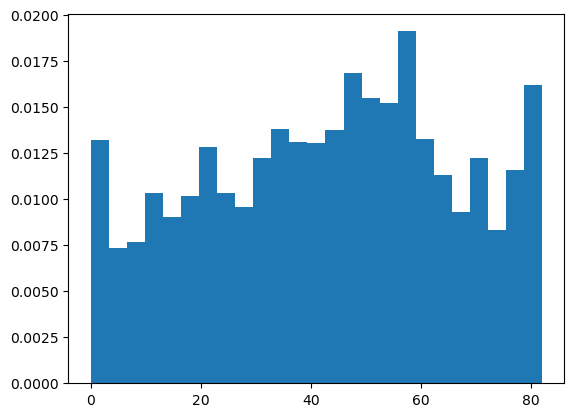

In [27]:
plt.hist(df['age'],density=True,bins = 25);

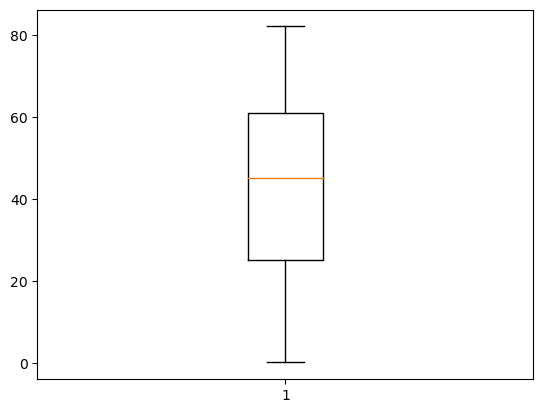

In [28]:
plt.boxplot(df.age);

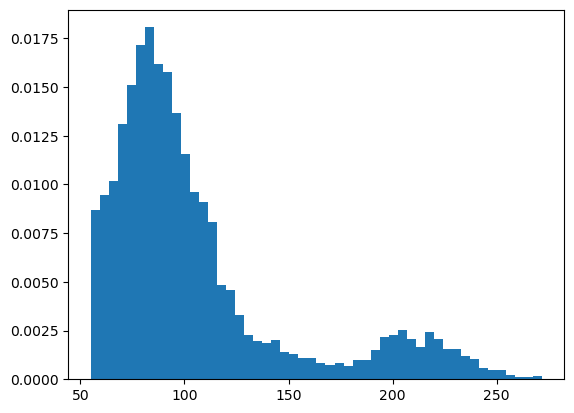

In [29]:
plt.hist(df.avg_glucose_level,bins = 50,density=True);

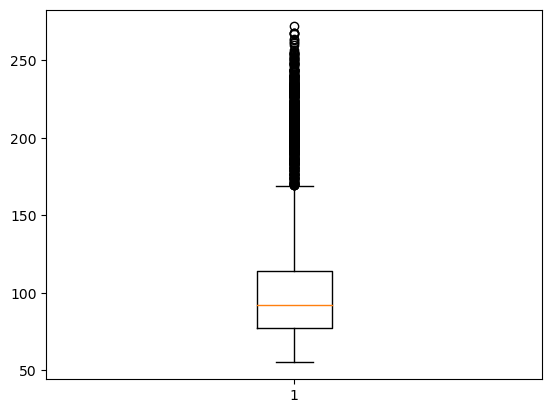

In [30]:
plt.boxplot(df.avg_glucose_level);

Since the histogram of the average glucose level is a mixture of normal distribution, so to check the outlier, we took the significance level as 5%.
Checking outlier for average glucose level.

In [32]:
q1 = df['avg_glucose_level'].quantile(0.05)
q3 = df['avg_glucose_level'].quantile(0.95)
iqr = q3 - q1
L = q1 - 1.5*iqr
U = q3 + 1.5*iqr

In [33]:
len(np.where(df['avg_glucose_level'] > U)[0])

0

In [34]:
if df[(df['avg_glucose_level'] > U) | (df['avg_glucose_level'] < L)].any(axis= None):
    print(True)
else:
    print(False)

False


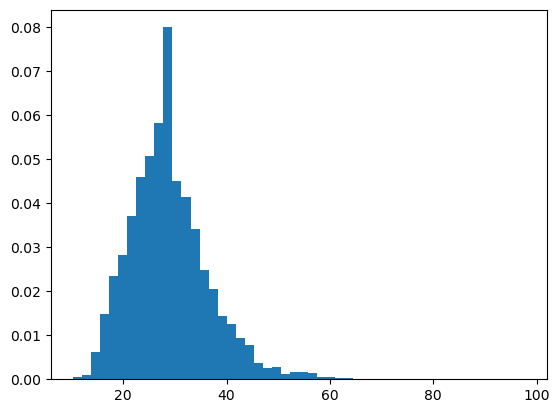

In [35]:
plt.hist(df.bmi,density=True,bins = 50);

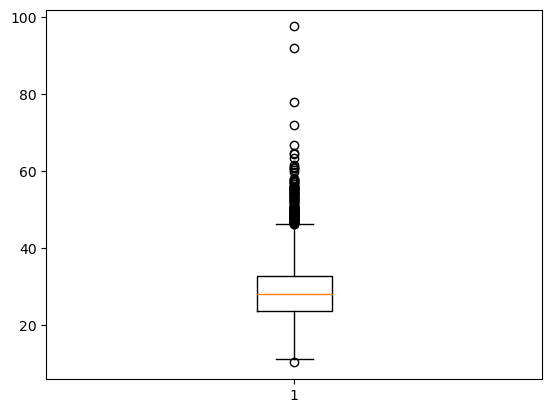

In [36]:
plt.boxplot(df.bmi);

Checking outlier for bmi values.

In [37]:
q1 = df.bmi.quantile(0.05)
q3 = df.bmi.quantile(0.95)
iqr = q3 - q1
l = q1 - 1.5*iqr
u = q3 + 1.5*iqr

In [38]:
len(np.where(df['bmi'] > u)[0])

2

In [39]:
len(np.where(df['bmi']<l)[0])

0

In [40]:
df.loc[(df['bmi'] > u),'bmi'] = u

Visualize the relations of bmi, average glucose level, age with stroke.

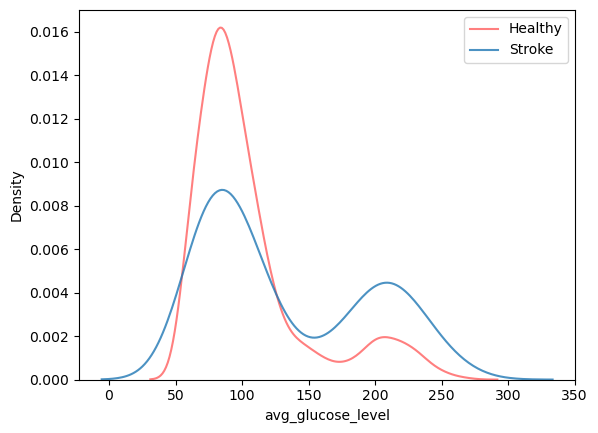

In [41]:
sns.kdeplot(x = 'avg_glucose_level',data = df[df.stroke ==0],alpha = 0.5,color = 'r',label ="Healthy")
sns.kdeplot(x = 'avg_glucose_level',data = df[df.stroke ==1],alpha = 0.8,label ="Stroke");
plt.legend();

So, from the above graph, we can say that, in between 50-150 glucose level, there is less probability that the person has a stroke, but still there is a chance. But after 155, there is a high risk of having stroke.

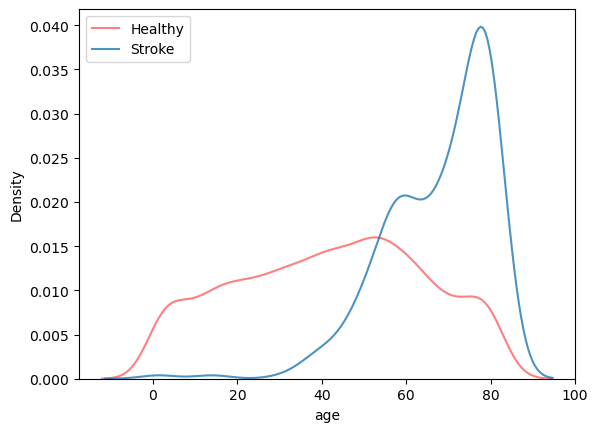

In [42]:
sns.kdeplot(x = 'age',data = df[df.stroke ==0],alpha = 0.5,color = 'r',label ="Healthy")
sns.kdeplot(x = 'age',data = df[df.stroke ==1],alpha = 0.8,label ="Stroke");
plt.legend();

From this graph, we can see that the risk of having stroke is high for the persons with age 55-80.

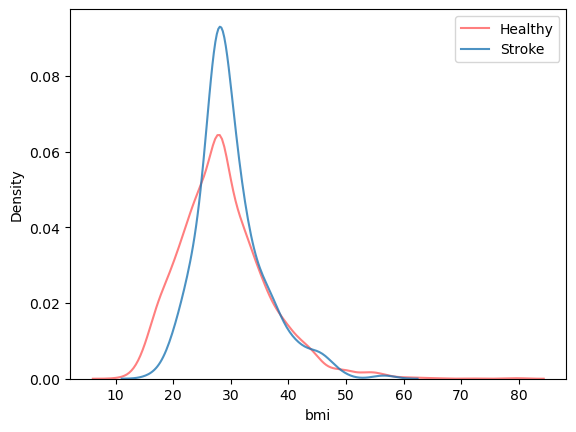

In [43]:
sns.kdeplot(x = 'bmi',data = df[df.stroke ==0],alpha = 0.5,color = 'r',label ="Healthy")
sns.kdeplot(x = 'bmi',data = df[df.stroke ==1],alpha = 0.8,label ="Stroke");
plt.legend();

People with BMI level of 30 is considered as 'obese', so there is a high risk having stroke and from graph we can see that the highest density is between 25-30.

#### Combination of contnuous and categorical variables

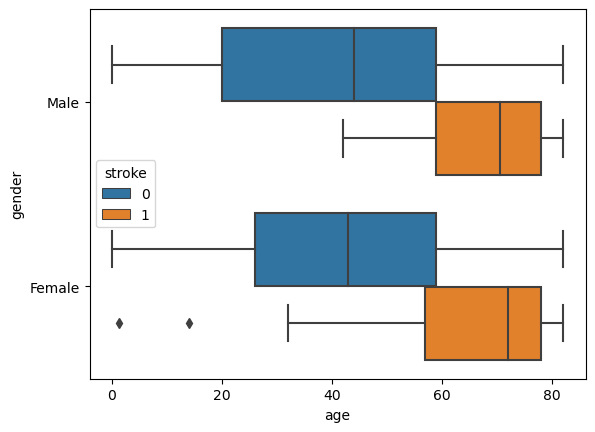

In [45]:
sns.boxplot(x = 'age',y = 'gender',hue = 'stroke',data = df);

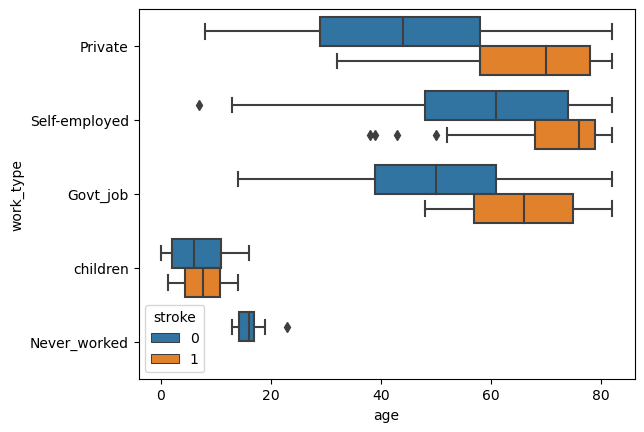

In [46]:
sns.boxplot(x = 'age',y = 'work_type',hue = 'stroke',data = df);

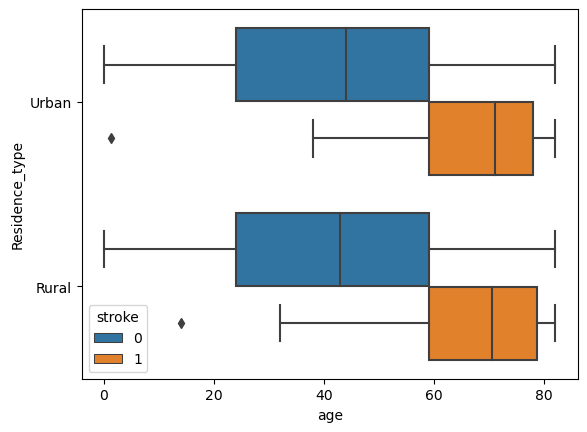

In [47]:
sns.boxplot(x = 'age',y = 'Residence_type',hue = 'stroke',data = df);

The above plot tells that residence has no effect on stroke.

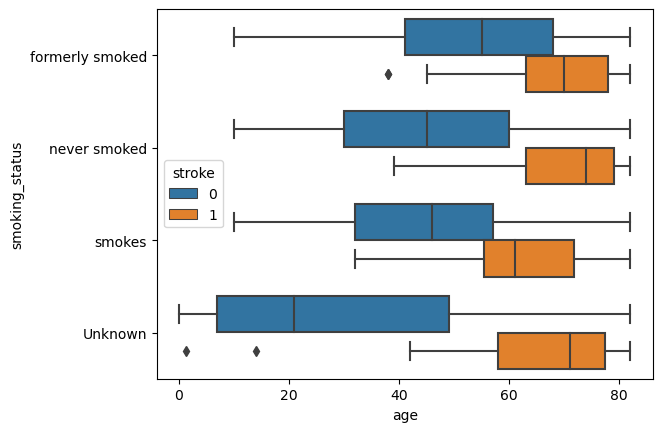

In [49]:
# it also tells the same story smoking doesn't have much impact stroke with age
sns.boxplot(x = 'age',y = 'smoking_status',hue = 'stroke',data = df);

From here, we can say that, both male and female have a greater risk of stroke as they age, but females are suffer from a little younger age.

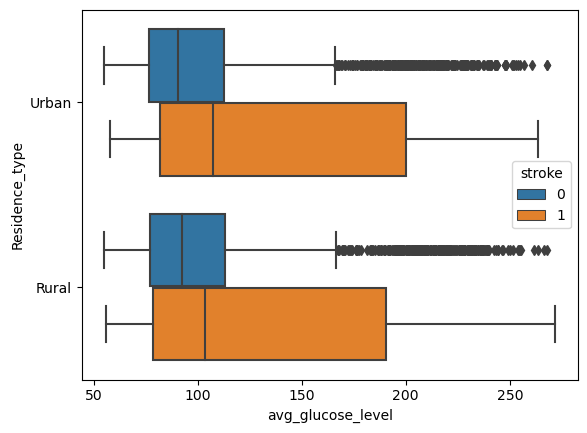

In [50]:
# residednce type doesn't have much impact on stroke
sns.boxplot(x = 'avg_glucose_level',y = 'Residence_type',hue = 'stroke',data = df);

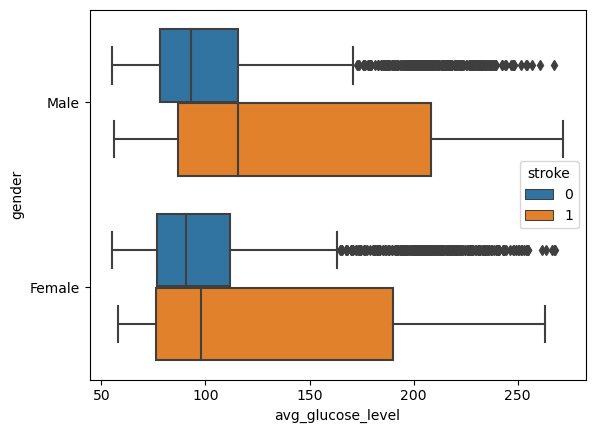

In [51]:
sns.boxplot(x = 'avg_glucose_level',y = 'gender',hue = 'stroke',data = df);

* Male has large values of glucose level and as glucose level increase, they have a large high risk.

* Male has greater risk of stroke than female with a little bit of large bmi value.



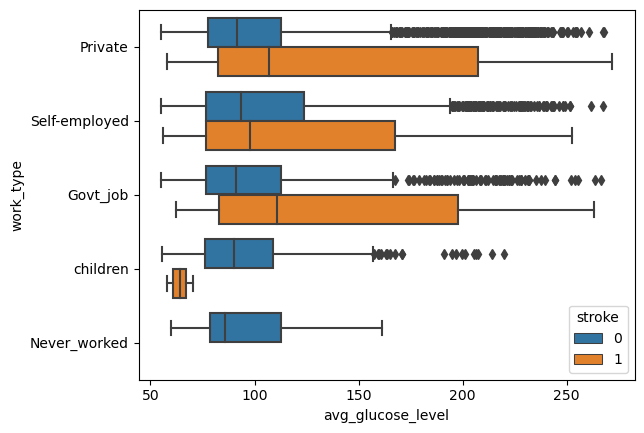

In [52]:
sns.boxplot(x = 'avg_glucose_level',y = 'work_type',hue = 'stroke',data = df);

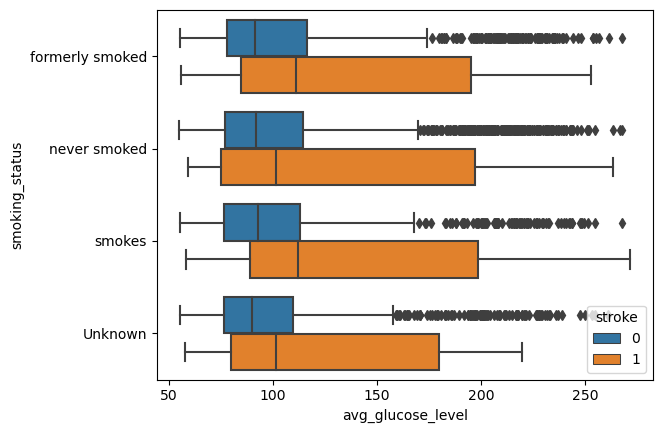

In [53]:
sns.boxplot(x = 'avg_glucose_level',y = 'smoking_status',hue = 'stroke',data = df);

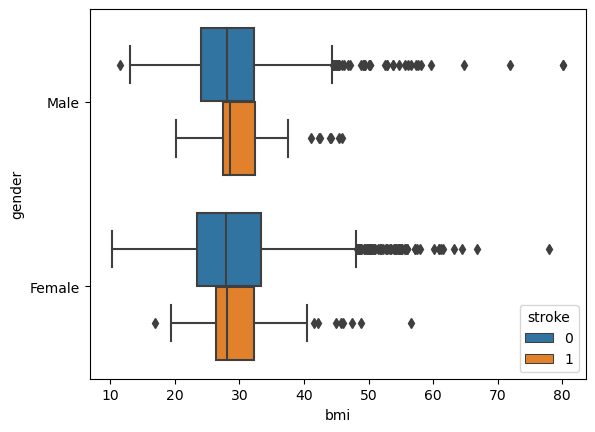

In [54]:
sns.boxplot(x = 'bmi',y = 'gender',hue = 'stroke', data = df);

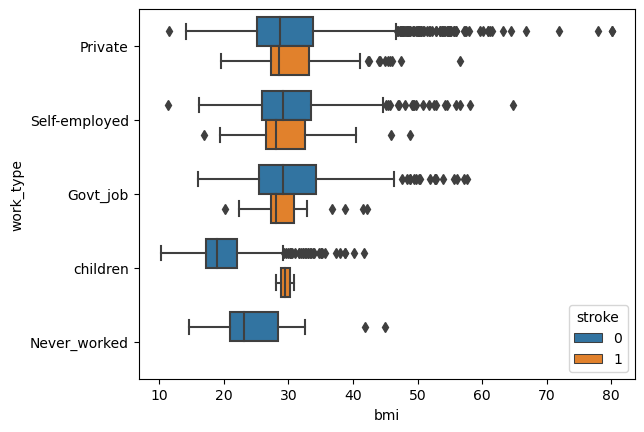

In [55]:
sns.boxplot(x = 'bmi',y = 'work_type',hue = 'stroke', data = df);

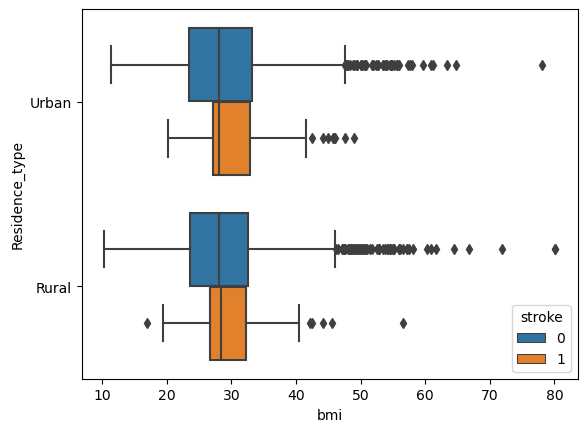

In [56]:
sns.boxplot(x = 'bmi',y = 'Residence_type',hue = 'stroke', data = df);

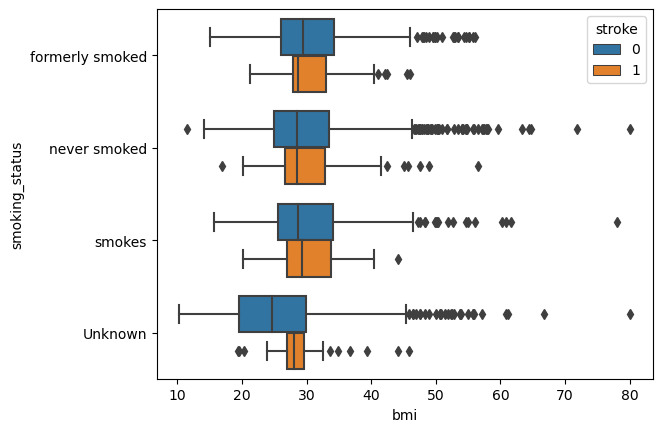

In [57]:
sns.boxplot(x = 'bmi',y = 'smoking_status',hue = 'stroke', data = df);

In [64]:
df.drop('id',inplace=True,axis = 1)

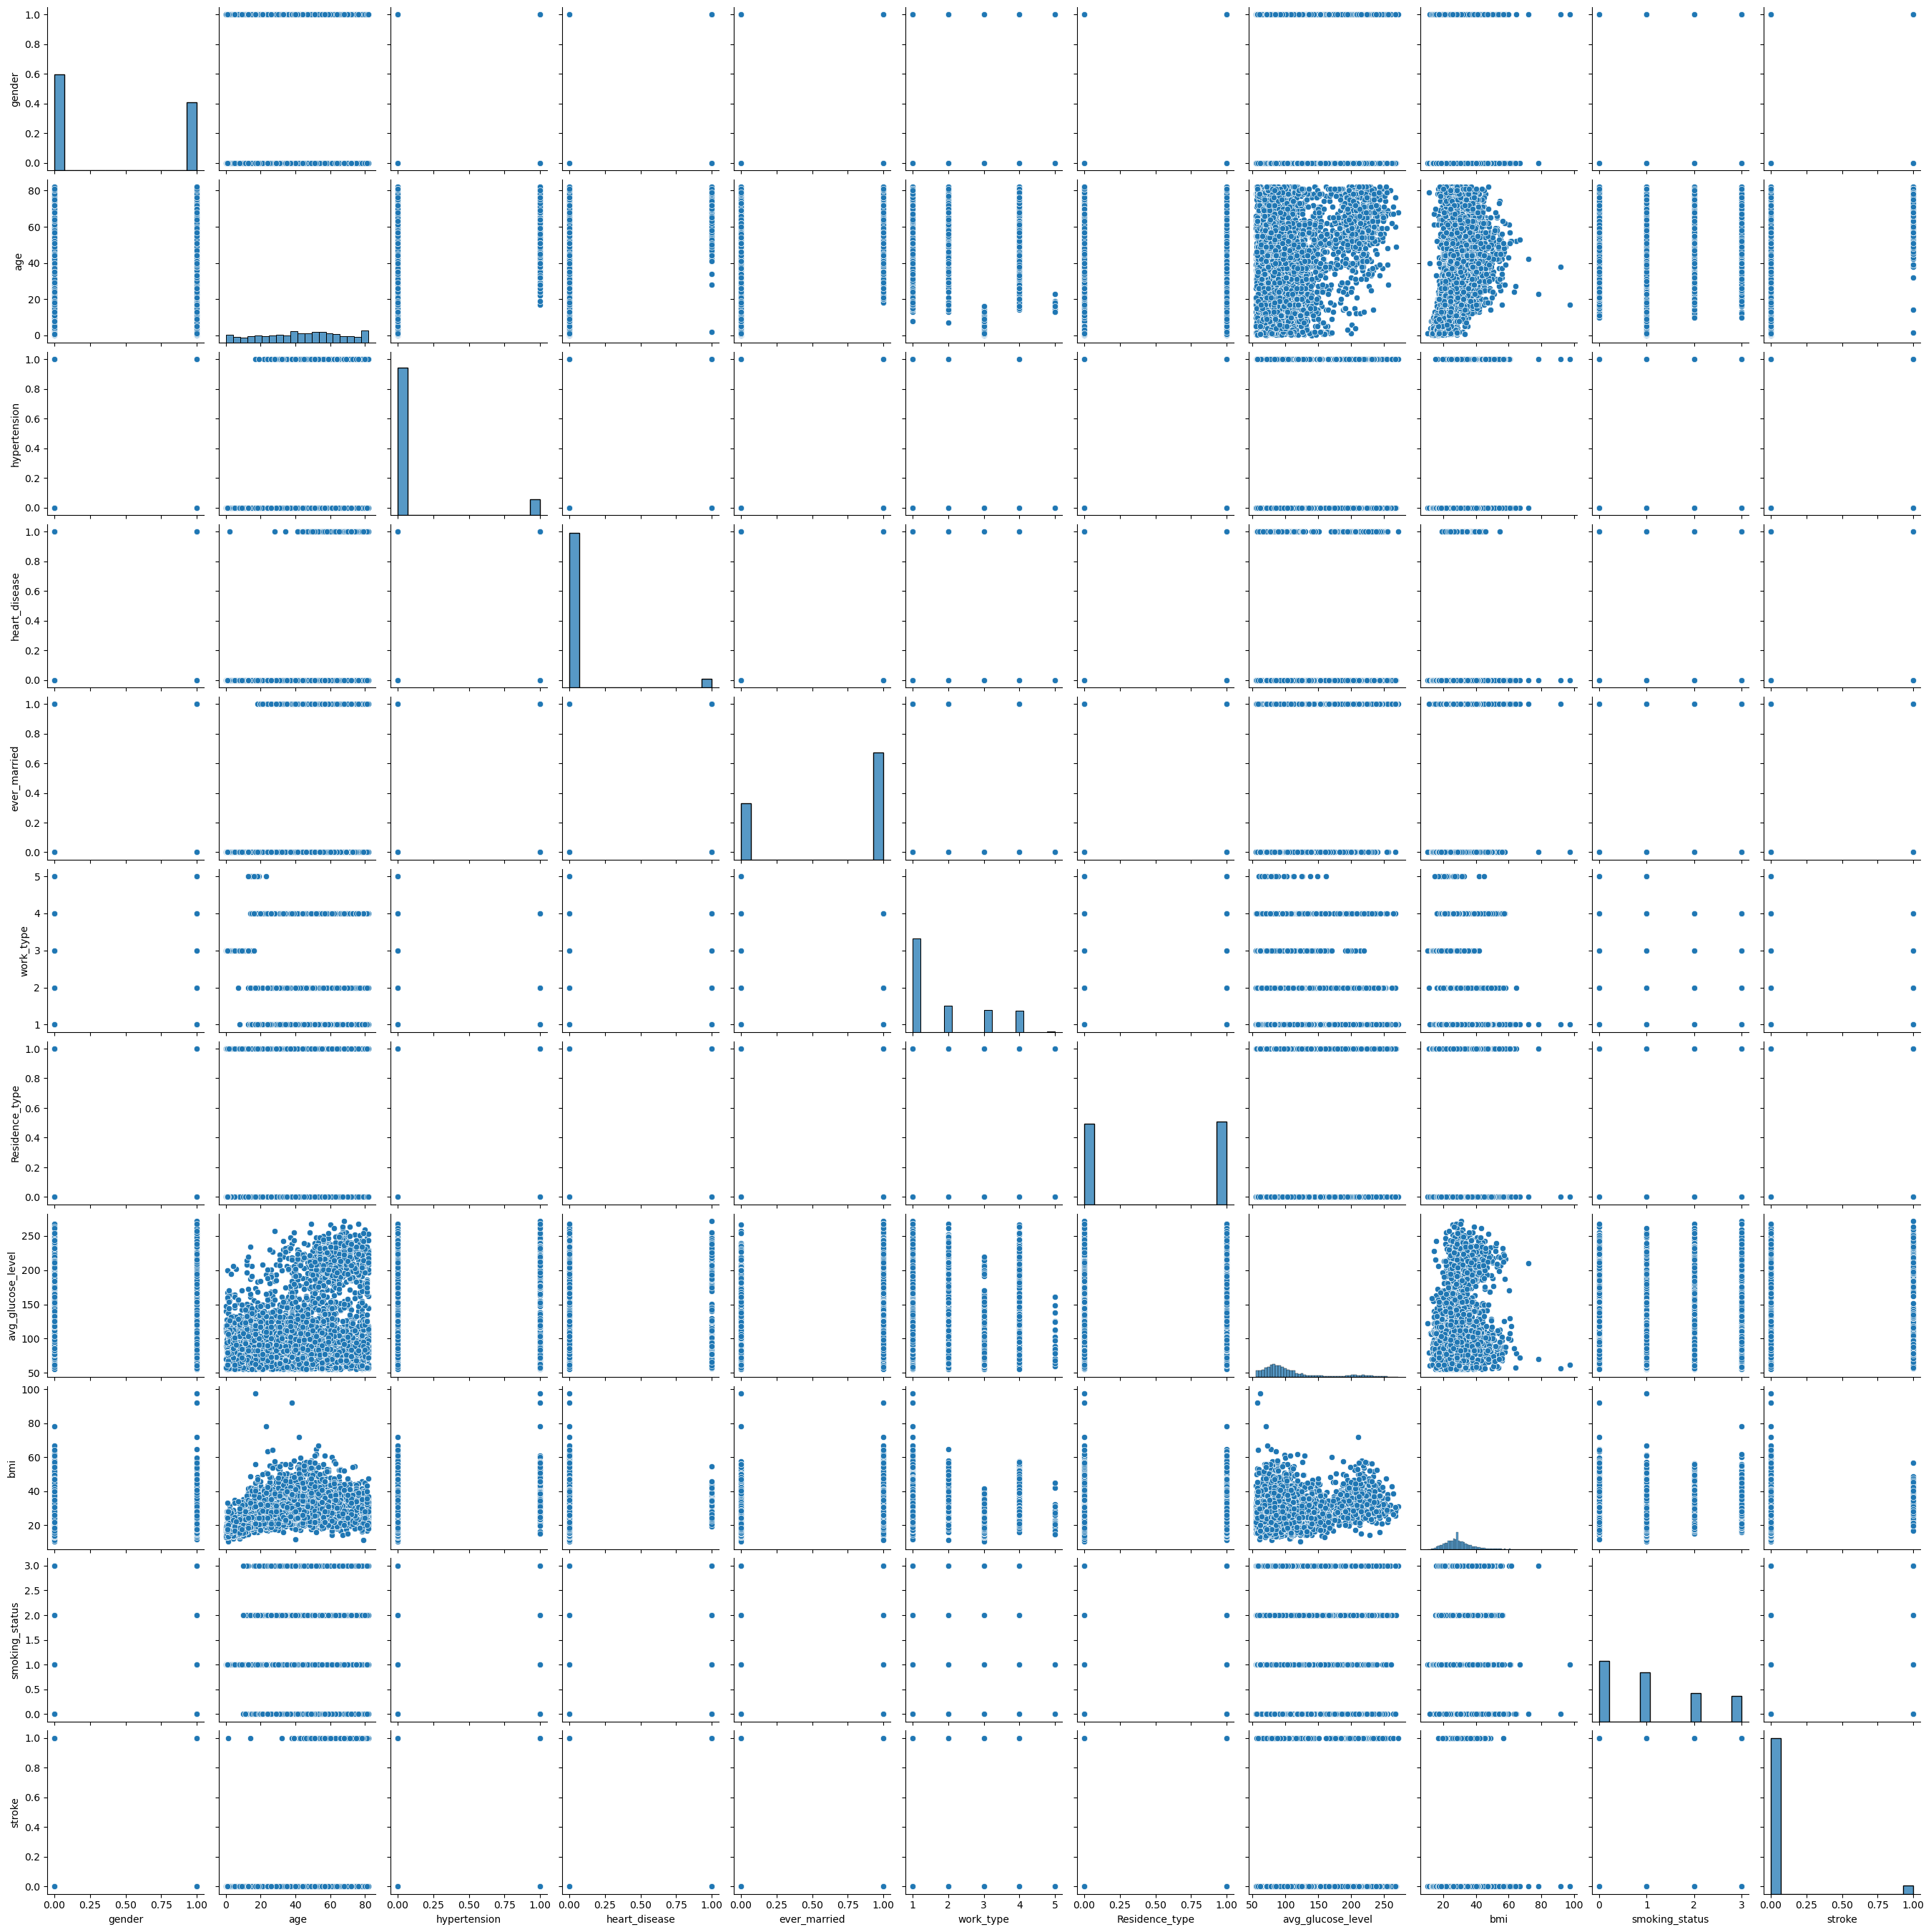

In [70]:
sns.pairplot(df_1.drop('id',axis = 1));
# this will show the how all the variables are correlated with each other